In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pylab as plt
from tqdm.notebook import tqdm
from scipy.special import gamma

from joblib import Parallel, delayed

import datetime

import glob

from matplotlib.cm import rainbow

In [2]:
audcad = pd.read_csv('zip_data/AUDCAD.csv')
audusd = pd.read_csv('zip_data/AUDUSD.csv')
chfjpy = pd.read_csv('zip_data/CHFJPY.csv')
eurchf = pd.read_csv('zip_data/EURCHF.csv')
eurgbp = pd.read_csv('zip_data/EURGBP.csv')
eurusd = pd.read_csv('zip_data/EURUSD.csv')
gbpjpy = pd.read_csv('zip_data/GBPJPY.csv')
gbpusd = pd.read_csv('zip_data/GBPUSD.csv')
nzdusd = pd.read_csv('zip_data/NZDUSD.csv')
usdcad = pd.read_csv('zip_data/USDCAD.csv')
usdchf = pd.read_csv('zip_data/USDCHF.csv')
usdjpy = pd.read_csv('zip_data/USDJPY.csv')
usdrub = pd.read_csv('zip_data/USDRUB.csv')

es = pd.read_csv('zip_data/NQ-21.12.csv')

data_set = [audcad, audusd,chfjpy, eurchf, eurgbp, eurusd,
            gbpjpy, gbpusd, nzdusd, usdcad, usdchf, usdjpy, usdrub]
pairs = ["audcad", "audusd","chfjpy", "eurchf", "eurgbp", "eurusd",
            "gbpjpy", "gbpusd", "nzdusd", "usdcad", "usdchf", "usdjpy", "usdrub" ]
#resampled = preprocessing.open.resample('1H').first()

In [3]:
def RS_func(row): #считает R/S на заданном временном ряде
    l = len(row)
    deviation = []
    mean = np.mean(row)
    for i in range(0,l):
        deviation.append(row[i] - mean)
    S = np.sqrt(np.sum(np.square(deviation)) / l)
    R = np.max(np.cumsum(deviation)) - np.min(np.cumsum(deviation))
    return R / S

def Hurst(rets,min_step): # (min_step лучше брать больше 50, а лучше больше 340)
    d = int((len(rets)) / min_step) # d - максимальное количество отрезков для расчета RS
    log_RS = []
    N = []
    d_log = int(np.log2(d))

    #for i in range(d,0,-1): # создание массива из длин отрезков для расчета RS
    #    N.append(int(len(rets)/i))

    for i in range(d_log,0,-1): # создание массива из длин отрезков для расчета RS
        N.append(int(len(rets)/2**i))

    for n in N: # расчет RS(n) и логарифмирование
        RS = []
        m = int(len(rets)/n)
        for i in range(0,m):
            row = rets[(i*n) : ((i+1)*n)]
            RS.append(RS_func(row))
        log_RS.append(np.log(np.mean(RS)))


    return np.polyfit(np.log(N), log_RS, 1)[0]

In [4]:
H_array = []

for set in tqdm(data_set):
    rets = np.array((set.close / set.open).values)
    H = Hurst(rets,5000)
    H_array.append(H)

  0%|          | 0/13 [00:00<?, ?it/s]

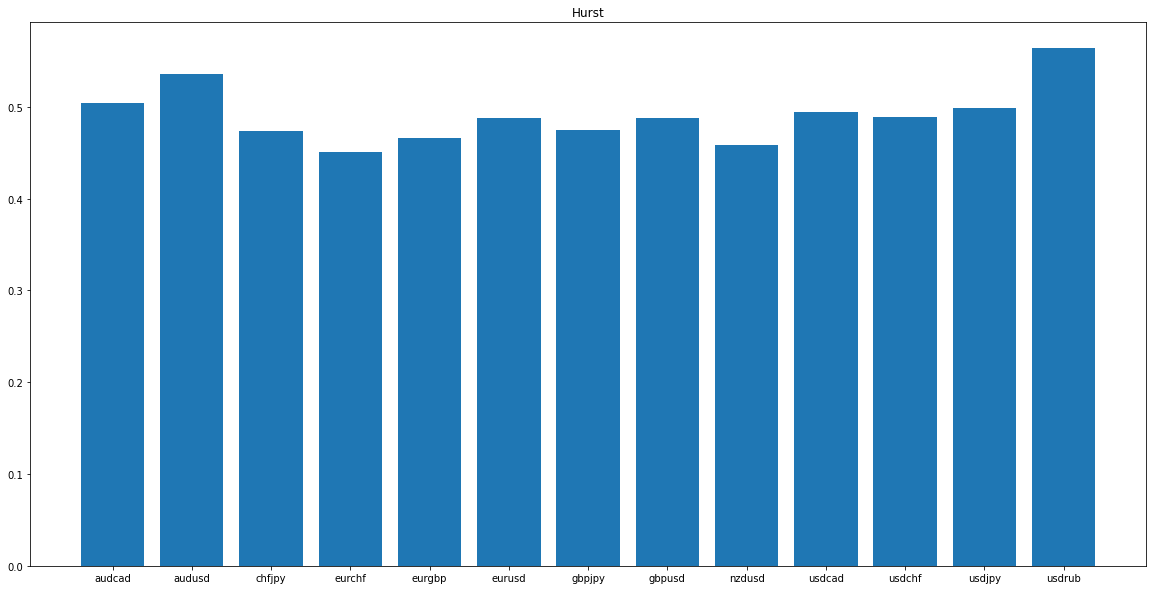

In [5]:
plt.figure(figsize=(20, 10))
plt.title("Hurst")
plt.bar(pairs, H_array)
#plt.xticks(rotation=90)
plt.show()